<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data cleaning notebook - use to clean/ merge/ rearrange data sets***

*Libraries used:*

In [ ]:
import pylab
import pandas as pd
import numpy as math
from google.colab import files
import io
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

*Importing, Encording and Indexing data:*

In [ ]:
data_path = '/content/complete_data_set.csv'
general_df = pd.read_csv(data_path, encoding ='latin-1')
general_df.set_index('Country')

,Commodity,Item,Unit,Year,Amount
Country,,,,,
Algeria,Total Grains/Cereals,Area Harvested,1000 Ha,1980,3181.380000
Algeria,Total Grains/Cereals,Yield,MT / Ha,1980,0.760260
Algeria,Total Grains/Cereals,Production Quantity,1000 MT,1980,2418.674400
Algeria,Economic Data,"Gross Domestic Product, constant prices",Percent change,1980,-5.400000
Algeria,Economic Data,GDP (constant 2005 US$),Million,1980,50817.865550
...,...,...,...,...,...
Peru,Total Grains/Cereals and Root Crops (R&T),Production Quantity,Grain Equiv. 1000 MT,2013,4256.022100
Peru,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,2013,199.770754
Peru,Total Grains/Cereals and Root Crops (R&T),Food Supply,Grain Equiv. 1000 MT,2013,8246.022100


Let's now create a new *'food_availibility_df'* and Isolate food availibility per capita for each country over *time*

In [ ]:
#Creating an intermediate food availibility data frame to drop out some cathegories#
intermediate_food_availibility_df = general_df[general_df.Commodity == "Total Grains/Cereals and Root Crops (R&T)"]
food_availibility_df = intermediate_food_availibility_df[intermediate_food_availibility_df.Item == 'Food Availability per capita']
food_availibility_df[["Country", "Year", "Commodity", "Item", "Unit", "Amount"]]
food_availibility_df = food_availibility_df.reset_index(drop = True)
food_availibility_df.set_index('Country')

,Commodity,Item,Unit,Year,Amount
Country,,,,,
Algeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,1980,206.507152
Algeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,1981,197.960152
Algeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,1982,196.535700
Algeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,1983,196.798051
Algeria,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,1984,191.743128
...,...,...,...,...,...
Peru,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,2009,189.090475
Peru,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,2010,191.126840
Peru,Total Grains/Cereals and Root Crops (R&T),Food Availability per capita,kg/cap/yr,2011,193.288913


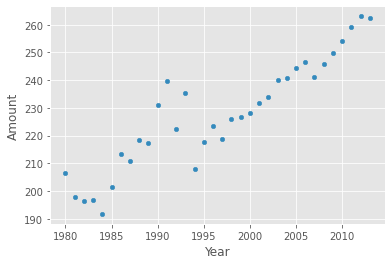

In [ ]:
algeria = food_availibility_df.loc[food_availibility_df['Country']=='Algeria']
algeria.plot(x ='Year', y = 'Amount', kind ='scatter')

Done! Now let's take a look at what we can do with HDI:

In [ ]:
data_path_2 = '/content/human-development-index.csv'
hdi_df = pd.read_csv(data_path_2, encoding ='latin-1')
hdi_df.drop('Code', inplace = True, axis=1)
hdi_df.columns = ['Country', 'Year', 'HDI']
hdi_df.set_index('Country')

,Year,HDI
Country,,
Afghanistan,1980,0.228
Afghanistan,1985,0.273
Afghanistan,2002,0.373
Afghanistan,2003,0.383
Afghanistan,2004,0.398
...,...,...
Zimbabwe,2013,0.516
Zimbabwe,2014,0.525
Zimbabwe,2015,0.529
